# **Лабораторная работа 1**
Дворецкий Никита М8О-109СВ-24

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Функция Матьяса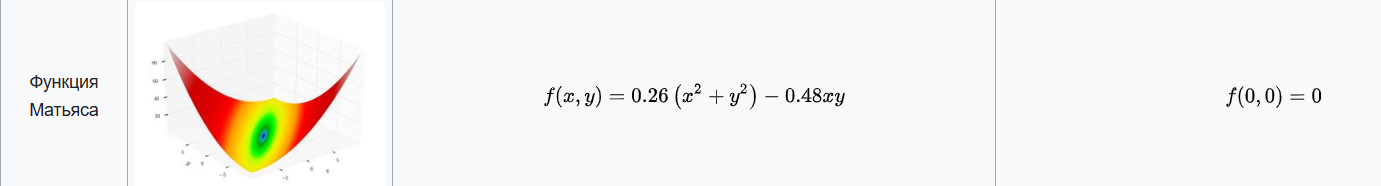

In [ ]:
def matyas_function(point):
    x, y = point
    return 0.26 * (x**2 + y**2) - 0.48 * x * y
def matyas_gradient(point):
    x, y = point
    grad_x = 0.52 * x - 0.48 * y
    grad_y = 0.52 * y - 0.48 * x
    return np.array([grad_x, grad_y])

Функция Бута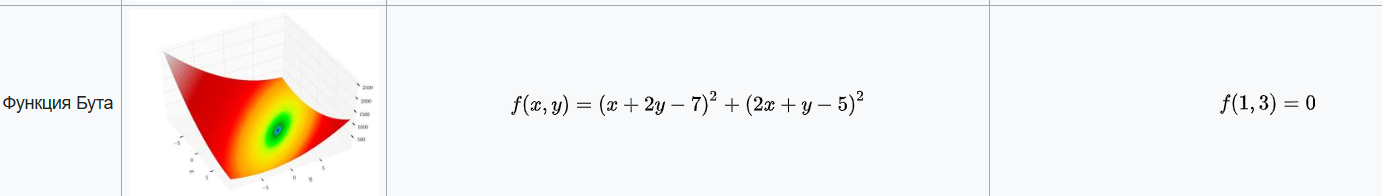


In [ ]:
def booth_function(point):
    x, y = point
    return (x+2*y-7)**2+(2*x+y-5)**2
def booth_gradient(point):
    x, y = point
    grad_x = 2 * (x + 2 * y - 7) + 4 * (2 * x + y - 5)
    grad_y = 4 * (x + 2 * y - 7) + 2 * (2 * x + y - 5)
    return np.array([grad_x, grad_y])

Функция Градиентного спуска

In [ ]:
def gradient_descent(grad_func, start, lern_rate, min_diff=1e-5):
    point = np.array(start, dtype=float)
    history = [point]
    n = 0
    while True:
        grad = grad_func(point)
        next_point = point - lern_rate * grad
        history.append(next_point)
        # Проверяем критерий остановки
        if np.linalg.norm(next_point - point) < min_diff:
            print(f"Сошлось за {n + 1} итераций.")
            break
        point = next_point
        n += 1
    return point, history

функция постороения графиков

In [ ]:
def visual(func, history, x_range, y_range, optimal_point,a=0):
    # Создаем сетку точек для построения поверхности
    x = np.linspace(*x_range, 100)
    y = np.linspace(*y_range, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.array([func([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

    # Создаем 3D-график
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Рисуем поверхность функции
    ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')

    # Добавляем траекторию градиентного спуска
    history = np.array(history)
    ax.plot(history[:, 0], history[:, 1], [func(point) for point in history], 'r.-', label='Trajectory')

    # Добавляем точку оптимума
    ax.scatter(optimal_point[0], optimal_point[1], func(optimal_point), color='blue', s=100, label='Optimal Point')

    # Настраиваем график
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.view_init(elev=30, azim=45+a)  # Повернуть график
    plt.show()

Тестирование

Сошлось за 107 итераций.


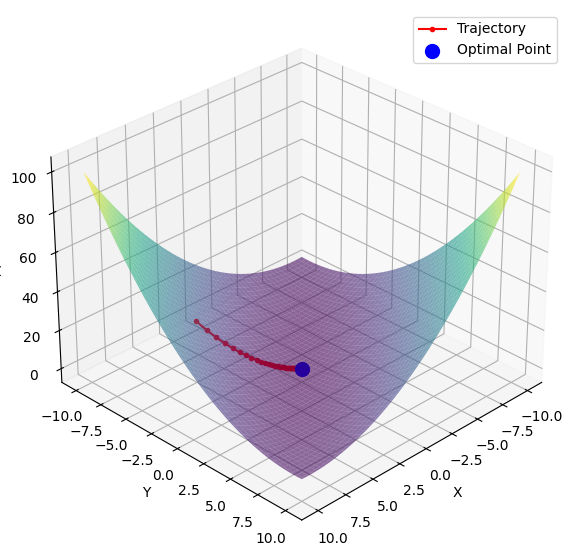

Найденная точка минимума: [ 7.05790819e-05 -7.05790819e-05]
Сошлось за 61 итераций.


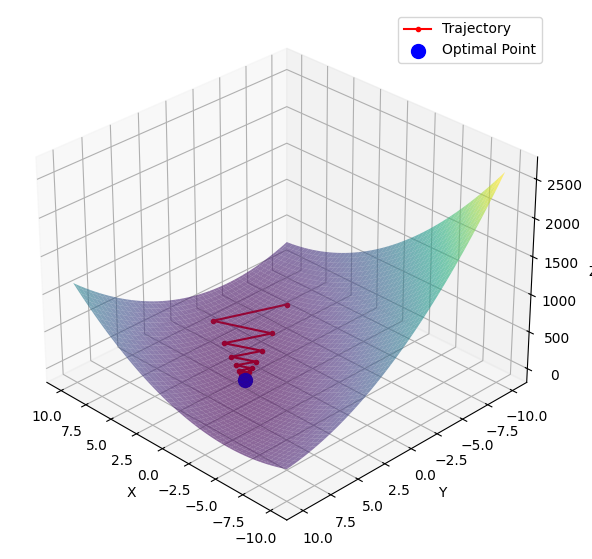

Найденная точка минимума: [1.00000613 2.99998774]


In [ ]:
#Матьяс
# Начальная точка
start = [5.0, -5.0]
result, history = gradient_descent(
    matyas_gradient,
    start,
    lern_rate=0.1
)
optimal_matyas = [0, 0]
x_range = (-10, 10)
y_range = (-10, 10)
visual(matyas_function,history,x_range,y_range,optimal_matyas)
print("Найденная точка минимума:", result)
#Бут
result, history = gradient_descent(
    booth_gradient,
    start,
    lern_rate=0.1
)
optimal_booth = [1, 3]
x_range = (-10, 10)
y_range = (-10, 10)
visual(booth_function,history,x_range,y_range,optimal_booth,a=90)
print("Найденная точка минимума:", result)

Функция тестирования

In [ ]:
def test(func_gradient, analytical_minimum, lern_rate, num_runs=10, x_range=(-10, 10), y_range=(-10, 10)):
    np.random.seed(42)  # Для воспроизводимости
    errors = []
    results = []

    for _ in range(num_runs):
        # Генерируем случайную начальную точку
        start = np.random.uniform(x_range[0], x_range[1], size=2)

        # Запускаем градиентный спуск
        result, _ = gradient_descent(func_gradient, start, lern_rate)
        results.append(result)

        # Вычисляем погрешность
        error = np.linalg.norm(result - analytical_minimum)
        errors.append(error)

    # Статистика
    print("Результаты:")
    for i, (res, err) in enumerate(zip(results, errors), 1):
        print(f"Запуск {i}: Найденное решение: {res}, Погрешность: {err:.6f}")

    print("\nСтатистика погрешностей:")
    print(f"Средняя погрешность: {np.mean(errors):.6f}")
    print(f"Максимальная погрешность: {np.max(errors):.6f}")
    print(f"Минимальная погрешность: {np.min(errors):.6f}")

    return errors

In [ ]:
# Тестируем Матьяс
print("\nТестирование функции Матьяса:")
errors_matyas = test(matyas_gradient, optimal_matyas, lern_rate=0.1, num_runs=10)


Тестирование функции Матьяса:
Сошлось за 1877 итераций.
Сошлось за 1881 итераций.
Сошлось за 2064 итераций.
Сошлось за 1514 итераций.
Сошлось за 1864 итераций.
Сошлось за 996 итераций.
Сошлось за 1382 итераций.
Сошлось за 2044 итераций.
Сошлось за 1717 итераций.
Сошлось за 1837 итераций.
Результаты:
Запуск 1: Найденное решение: [0.00176499 0.00176499], Погрешность: 0.002496
Запуск 2: Найденное решение: [0.00176574 0.00176574], Погрешность: 0.002497
Запуск 3: Найденное решение: [-0.00176439 -0.00176439], Погрешность: 0.002495
Запуск 4: Найденное решение: [-0.00176078 -0.00176078], Погрешность: 0.002490
Запуск 5: Найденное решение: [0.00176754 0.00176754], Погрешность: 0.002500
Запуск 6: Найденное решение: [-0.00176207 -0.00176207], Погрешность: 0.002492
Запуск 7: Найденное решение: [0.00176704 0.00176704], Погрешность: 0.002499
Запуск 8: Найденное решение: [-0.00176378 -0.00176378], Погрешность: 0.002494
Запуск 9: Найденное решение: [-0.00176207 -0.00176207], Погрешность: 0.002492
Запу

In [ ]:
# Тестируем Бута
print("\nТестирование функции Бута:")
errors_booth = test(booth_gradient, analytical_minimum=optimal_booth, lern_rate=0.1, num_runs=10)


Тестирование функции Бута:
Сошлось за 59 итераций.
Сошлось за 59 итераций.
Сошлось за 67 итераций.
Сошлось за 62 итераций.
Сошлось за 58 итераций.
Сошлось за 61 итераций.
Сошлось за 60 итераций.
Сошлось за 67 итераций.
Сошлось за 63 итераций.
Сошлось за 64 итераций.
Результаты:
Запуск 1: Найденное решение: [0.9999916 3.0000144], Погрешность: 0.000017
Запуск 2: Найденное решение: [1.00000872 2.99999754], Погрешность: 0.000009
Запуск 3: Найденное решение: [0.99999683 2.99999603], Погрешность: 0.000005
Запуск 4: Найденное решение: [0.9999947  3.00001206], Погрешность: 0.000013
Запуск 5: Найденное решение: [0.99999652 2.99999694], Погрешность: 0.000005
Запуск 6: Найденное решение: [0.99998377 3.00000981], Погрешность: 0.000019
Запуск 7: Найденное решение: [1.00001677 2.99998918], Погрешность: 0.000020
Запуск 8: Найденное решение: [0.99999704 2.99999625], Погрешность: 0.000005
Запуск 9: Найденное решение: [0.99999518 2.99999754], Погрешность: 0.000005
Запуск 10: Найденное решение: [1.00000

Запрограммировать одну моментную модификацию и протестировать ее

In [ ]:
def momentum(grad_func, start, lern_rate, beta=0.9, min_diff=1e-5):
    point = np.array(start, dtype=float)
    velocity = np.zeros_like(point)
    history = [point]
    n = 0

    while True:
        grad = grad_func(point)
        velocity = beta * velocity - lern_rate * grad
        next_point = point + velocity
        history.append(next_point)

        # Проверяем критерий остановки
        if np.linalg.norm(next_point - point) < min_diff:
            print(f"Сошлось за {n + 1} итераций.")
            break
        point = next_point
        n += 1

    return point, history


использования с функцией Матъяса


Градиентный спуск с моментум для функции Матьяса:
Сошлось за 166 итераций.


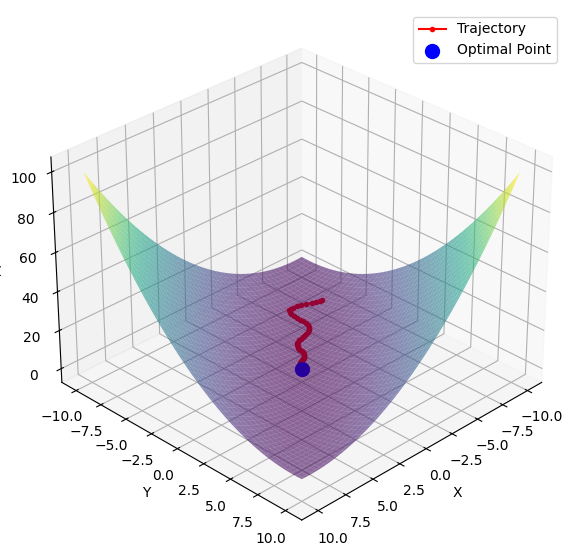

Найденная точка минимума (моментум): [-0.00082028 -0.00113918]

Градиентный спуск с моментум для функции Бута:
Сошлось за 209 итераций.


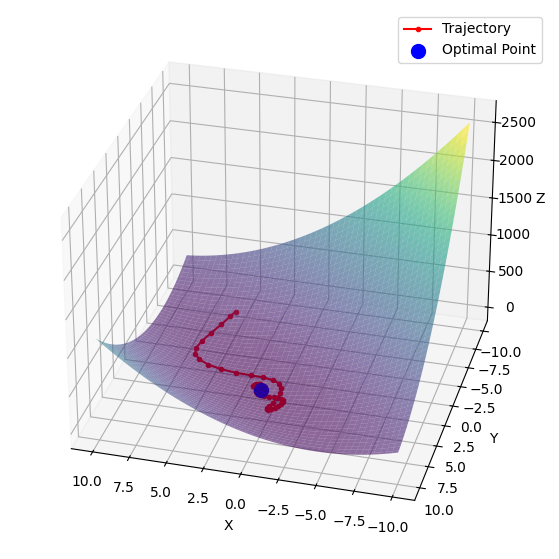

Найденная точка минимума (моментум): [0.99993253 3.00013318]


In [ ]:
print("\nГрадиентный спуск с моментум для функции Матьяса:")
result, history = momentum(matyas_gradient, start=[-7.0,-5.0], lern_rate=0.1, beta=0.9)
visual(matyas_function, history, x_range, y_range, optimal_matyas)
print("Найденная точка минимума (моментум):", result)

print("\nГрадиентный спуск с моментум для функции Бута:")
result, history = momentum(booth_gradient, start, lern_rate=0.01, beta=0.9)
visual(booth_function, history, x_range, y_range, optimal_booth, a=60)
print("Найденная точка минимума (моментум):", result)

Запрограммировать одну адаптивную модификацию и протестировать ее

In [ ]:
def adagrad(grad_func, start, lern_rate=0.1, epsilon=1e-8, min_diff=1e-5):
    point = np.array(start, dtype=float)
    grad_squares = np.zeros_like(point)
    history = [point]
    n = 0

    while True:
        grad = grad_func(point)
        grad_squares += grad ** 2
        next_point = point - (lern_rate / (np.sqrt(grad_squares) + epsilon)) * grad
        history.append(next_point)

        # Проверяем критерий остановки
        if np.linalg.norm(next_point - point) < min_diff:
            print(f"Сошлось за {n + 1} итераций.")
            break

        point = next_point
        n += 1

    return point, history


AdaGrad для функции Матьяса:
Сошлось за 4292 итераций.


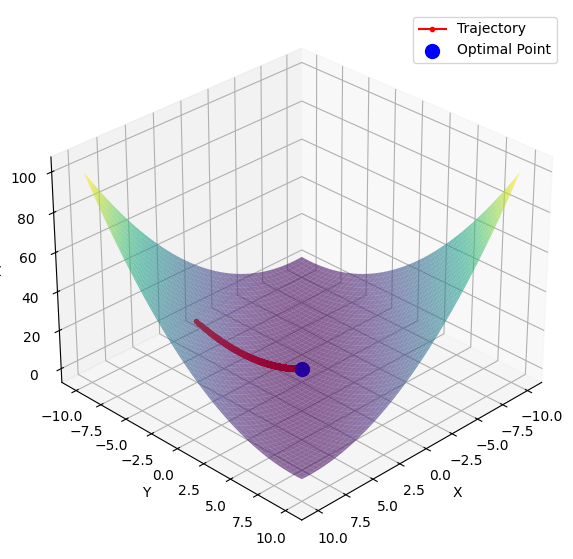

Найденная точка минимума (AdaGrad): [ 0.00466265 -0.00466265]

AdaGrad для функции Бута:
Сошлось за 11784 итераций.


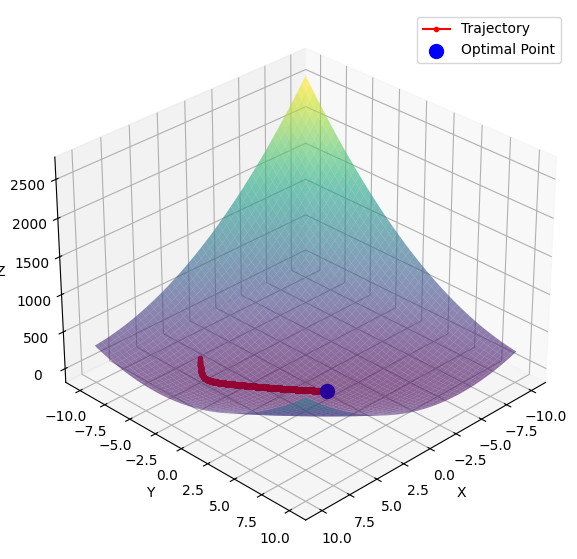

Найденная точка минимума (AdaGrad): [1.01314294 2.98465409]


In [ ]:
print("\nAdaGrad для функции Матьяса:")
result, history = adagrad(matyas_gradient, start, lern_rate=0.1)
visual(matyas_function, history, x_range, y_range, optimal_matyas)
print("Найденная точка минимума (AdaGrad):", result)

print("\nAdaGrad для функции Бута:")
result, history = adagrad(booth_gradient, start, lern_rate=0.1)
visual(booth_function, history, x_range, y_range, optimal_booth)
print("Найденная точка минимума (AdaGrad):", result)


Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их

In [ ]:
def gradient_descent_with_lr_decay(grad_func, start, eta_0=0.1, decay_rate=0.01, min_diff=1e-6):
    point = np.array(start, dtype=float)
    history = [point]
    n = 0

    while True:
        grad = grad_func(point)
        # Эволюция темпа обучения
        eta = eta_0 * np.exp(-decay_rate * n)
        next_point = point - eta * grad
        history.append(next_point)

        # Проверяем критерий остановки
        if np.linalg.norm(next_point - point) < min_diff:
            print(f"Сошлось за {n + 1} итераций.")
            break

        point = next_point
        n += 1

    return point, history


Градиентный спуск с затуханием темпа обучения для функции Матьяса:
Сошлось за 348 итераций.


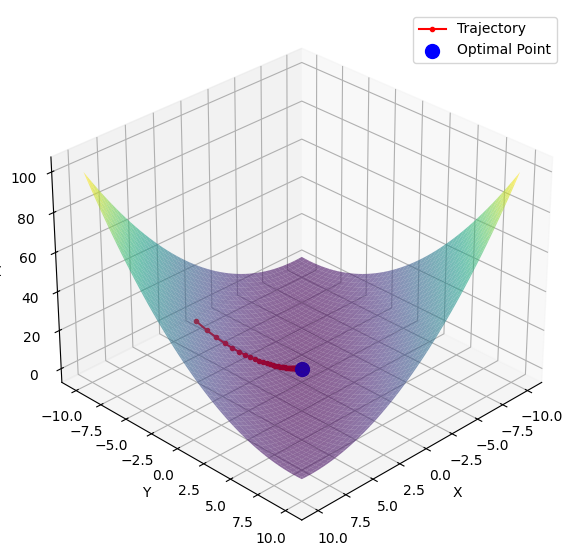

Найденная точка минимума: [ 0.00022664 -0.00022664]

Градиентный спуск с затуханием темпа обучения для функции Бута:
Сошлось за 98 итераций.


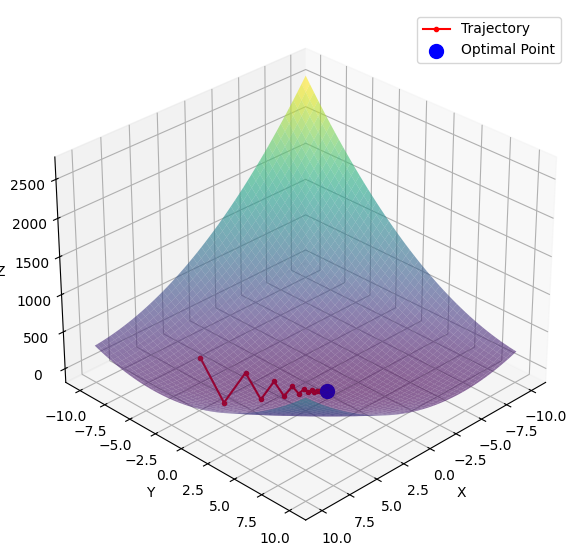

Найденная точка минимума: [1.00000871 2.99999129]


In [ ]:
print("\nГрадиентный спуск с затуханием темпа обучения для функции Матьяса:")
result, history = gradient_descent_with_lr_decay(
    matyas_gradient,
    start,
    eta_0=0.1,
    decay_rate=0.01
)
visual(matyas_function, history, x_range, y_range, optimal_matyas)
print("Найденная точка минимума:", result)

print("\nГрадиентный спуск с затуханием темпа обучения для функции Бута:")
result, history = gradient_descent_with_lr_decay(
    booth_gradient,
    start,
    eta_0=0.1,
    decay_rate=0.01
)
visual(booth_function, history, x_range, y_range, optimal_booth)
print("Найденная точка минимума:", result)
